# 📊 Synthetic Stock Data Analysis
This notebook analyzes synthetic stock market data with visualizations, statistical tests, and basic forecasting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
import numpy as np

## 📥 Load the CSV data

In [2]:
data = pd.read_csv('synthetic_stock_data.csv', parse_dates=True, index_col=0)
data.head()

,Open,High,Low,Close,Adj Close,Volume
2020-01-01,137.454012,288.597775,98.221032,193.271051,158.271445,1535620
2020-01-02,195.071431,261.586319,93.804200,154.425397,181.247382,1779105
2020-01-03,173.199394,223.295947,97.756119,120.028202,132.694102,3902761
2020-01-06,159.865848,202.440078,99.644767,161.678361,130.574396,1916992
2020-01-07,115.601864,287.009887,92.037665,174.288149,140.270372,1220326


## 🧾 Dataset Overview

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1044 entries, 2020-01-01 to 2024-01-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1044 non-null   float64
 1   High       1044 non-null   float64
 2   Low        1044 non-null   float64
 3   Close      1044 non-null   float64
 4   Adj Close  1044 non-null   float64
 5   Volume     1044 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 57.1 KB


## 📈 Plot Close Price Over Time

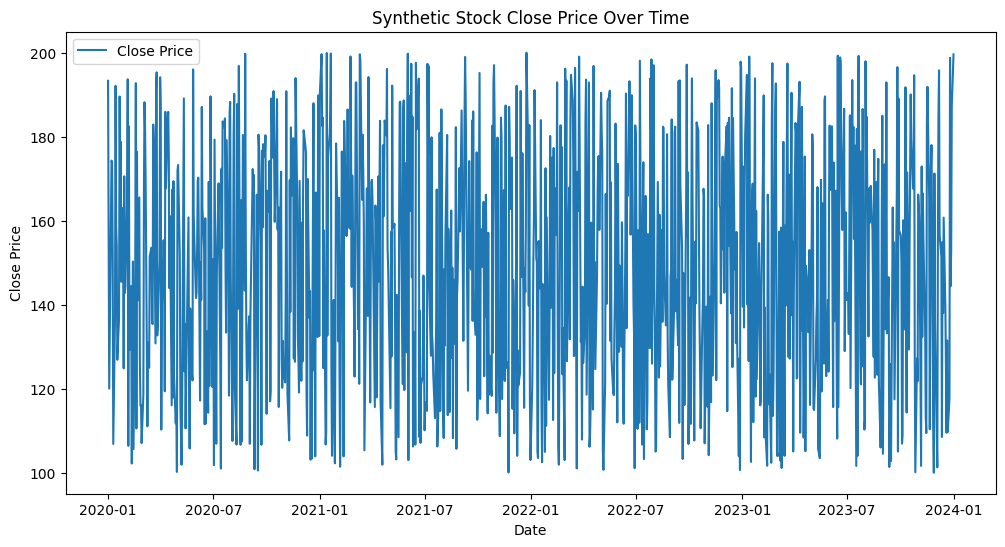

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price')
plt.title('Synthetic Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## 🔄 Autocorrelation Plot

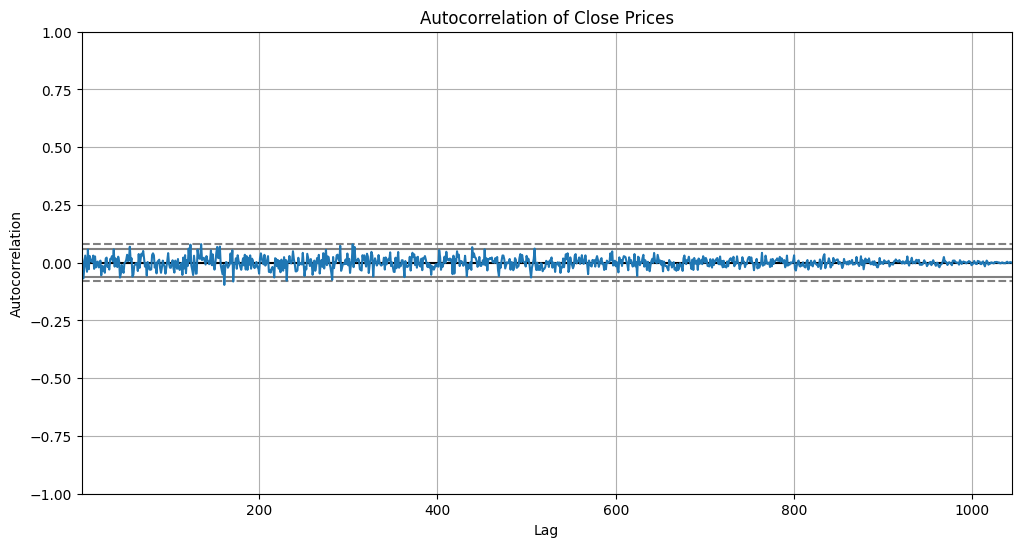

In [5]:
plt.figure(figsize=(12, 6))
autocorrelation_plot(data['Close'])
plt.title('Autocorrelation of Close Prices')
plt.show()

## 🧪 ADF Test for Stationarity

In [6]:
result = adfuller(data['Close'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -19.497732539298514
p-value: 0.0
Critical Values: {'1%': np.float64(-3.436647308529461), '5%': np.float64(-2.864320407484321), '10%': np.float64(-2.568250401889486)}


## 🤖 Predictive Modeling with Linear Regression

In [7]:
data['Day'] = np.arange(len(data))
X = data[['Day']]
y = data['Close']

model = LinearRegression()
model.fit(X, y)

data['Predicted_Close'] = model.predict(X)

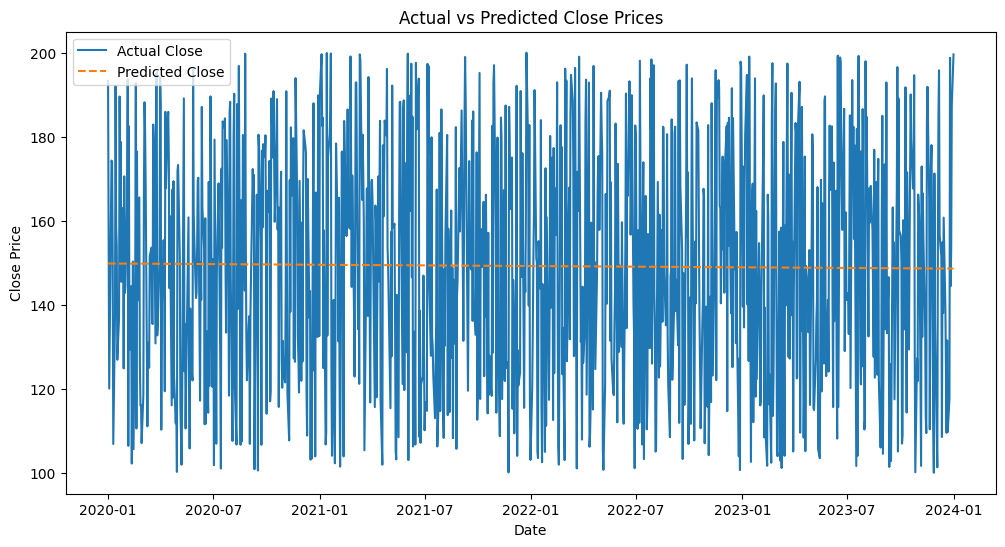

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Close')
plt.plot(data.index, data['Predicted_Close'], label='Predicted Close', linestyle='--')
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()